# Python for Data Science, Level I
### *Session \#9*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Review

### Warm Ups

---

**Import pandas/matplotlib, set style, and create dataframe:**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-pastel') 

df = pd.read_csv("housing_prices.csv")

**Groupby:** `df.groupby('charles_river')['median_price'].mean()`

**Pivot table**: `df.pivot_table('median_price', index='highway_access')`

**Generate correlation table:** `df.corr()`

### Exercises
---
**1. Use a groupby to find the average** `nitrous` **rate grouped by** `highway_access`

In [5]:
result = df.groupby('highway_access')['nitrous'].mean()

**2. Plot the result as a bar chart**



In [ ]:
result.plot.bar()

**3. Generate the correlation table for the housing dataset, then fetch just the** `median_price` **row.**

In [8]:
cors = df.corr().loc['median_price']

**4. Create a bar plot of this Series to see which house features are more/less correlated with price.**

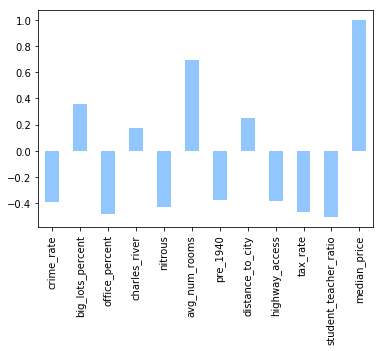

In [9]:
cors.plot.bar()

**5. Create a histogram of the** `highway_access` **column by fetching the column then calling** `.plot.hist()`

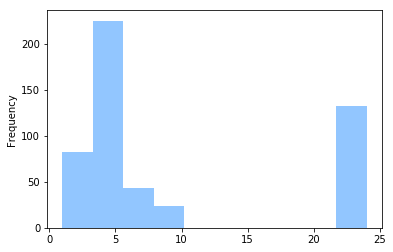

In [10]:
df['highway_access'].plot.hist()

**6. Create a scatter plot of the** `distance_to_city` **and** `median_price` **columns using:** `.plot.scatter(x='distance_to_city', y='median_price')`

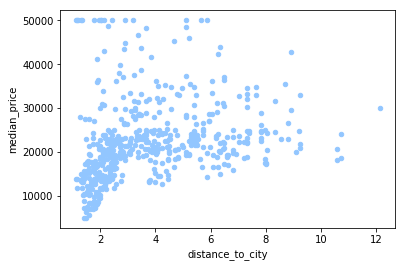

In [12]:
df.plot.scatter(x='distance_to_city', y='median_price')

## II. Basic Linear Regression

### Warm Ups

---

**Necessary imports:**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

**Create a linear model:** `model = LinearRegression()`

In [27]:
model = LinearRegression()

**Manually set the y-intercept of the model:** `model.intercept_ = 6000.0`

In [28]:
model.intercept_ = 6000.0

**Manually set the coefficient(s) of the model:** `model.coef_ = np.array([3000.0])` 

In [29]:
model.coef_ = np.array([3000.0])

**Make prediction column using your linear model:** `prediction = model.predict(df[['distance_to_city']])`

In [30]:
prediction = model.predict(df[['distance_to_city']])

**Plot your data and model:**
    
```python
plt.scatter(df['distance_to_city'], df['median_price'], color='black')
plt.plot(df['distance_to_city'], prediction)
```

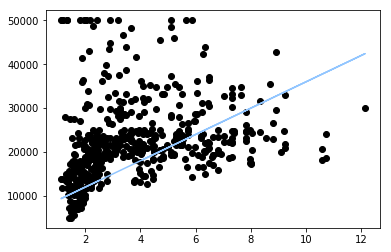

In [31]:
plt.scatter(df['distance_to_city'], df['median_price'], color='black')
plt.plot(df['distance_to_city'], prediction)

### Exercises
---
**1. Create a scatter plot with** `avg_num_rooms` **as the x-axis and** `median_price` **as y-axis**

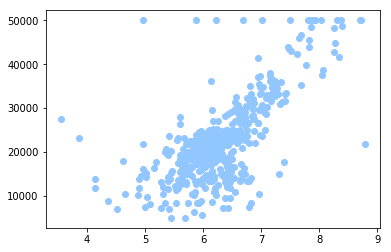

In [33]:
plt.scatter(df['avg_num_rooms'], df['median_price'])

**2. Create a** `LinearRegression` **model and manually set the intercept and coefficient.**

Hint: Try setting the intercept around `-35000` and the coefficient around `6000`.

In [44]:
model = LinearRegression()
model.intercept_ = -35000
model.coef_ = np.array([6000])

**3. Assign** `predicted` **to the output of** `model.predict()` **called on** `avg_num_rooms`

Hint: Remember that `model.predict()` expects a dataframe, not a column. 

In [39]:
predicted = model.predict(df[['avg_num_rooms']])

**4. Create a line plot with** `predicted` **as the y-axis and** `avg_num_rooms` **as the x-axis.** 

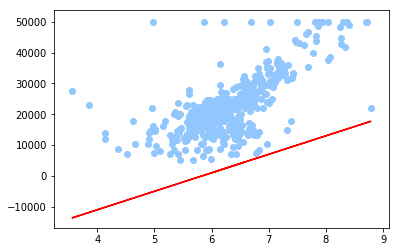

In [43]:
plt.plot(df['avg_num_rooms'], predicted, color='red')
plt.scatter(df['avg_num_rooms'], df['median_price'])

**5. Let's figure out which line has "best fit"! Write a function** `squared_error()` **that first takes two columns and finds the difference between each corresponding element. It should then square each difference and return the sum.**

Hint: No looping needed -- you can use subtraction on the columns themselves, thanks to Numpy element-wise operations.

In [46]:
def squared_error(col1, col2):
    squares = (col1-col2)**2
    return squares.sum()

**6. Use** `squared_error()` **on the column** `median_price` **and** `predicted` **to see how well your line fits the data. This will be a BIG number -- don't worry! Tweak the intercept and coefficient, to see how it improves or degrades the fit of your line.**

In [47]:
squared_error(df['median_price'], predicted)

223334445692.0

**7. Use** `model.fit()` **on** `avg_num_rooms` **and** `median_price` **to automatically optimize your linear model according to squared error. Repeat the steps from exercise 3 and 4 to overwrite** `predicted` **using your optimized model and graph the results.**

In [48]:
model.fit(df[['avg_num_rooms']], df['median_price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

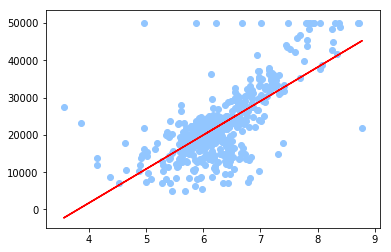

In [50]:
predicted = model.predict(df[['avg_num_rooms']])
plt.plot(df['avg_num_rooms'], predicted, color='red')
plt.scatter(df['avg_num_rooms'], df['median_price'])